# EDA: Projectname

## Project Preview

<img src="../assets/picture.jpg" alt="Title-Pic">

### Data StoryTelling

We want to find out, whether or whether not the movie length has decreased over the time until 2021.
<br>

### Also

- which genre got the highest and and which got lowest duration time
- which genre is the most produced (Movie and TV-Show separated)
- what kind of type of movies got the highest and lowest duration time
- which country releases the most Movies / TV-Shows
- which country releases the longest Movies / TV-Shows

## Imports

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame


np.set_printoptions(suppress=True)

sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")

## Data overview

In [272]:
DATA_PATH = "../data/netflix_data.csv"
raw_data_df = pd.read_csv(DATA_PATH, delimiter=",")
raw_data_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


In [273]:
df_cleaned = raw_data_df.copy()
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [274]:
df_cleaned.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


- data from 1925 to 2021

In [275]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [276]:
df_cleaned.shape[0]

7787

- director with missing values
- cast with missing values
- country with missing values
- date_added with missing values

## Data cleaning & preprocessing

In [277]:
df_cleaned.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [278]:
# columns
SHOW_ID = "show_id"
TYPE = "type"
TITLE = "title"
DIRECTOR = "director"
CAST = "cast"
COUNTRY = "country"
DATE_ADDED = "date_added"
RELEASE_YEAR = "release_year"
DURATION = "duration"
DESCRIPTION = "description"
GENRE = "genre"

# added columns

# notebook constants


the columns we are interested in are: [RELEASE_YEAR, DURATION, TYPE, COUNTRY, GENRE]

In [279]:
needed_columns = [RELEASE_YEAR, DURATION, TYPE, COUNTRY, GENRE]
df_cleaned = df_cleaned[needed_columns]
df_cleaned

,release_year,duration,type,country,genre
0,2020,4,TV Show,Brazil,International TV
1,2016,93,Movie,Mexico,Dramas
2,2011,78,Movie,Singapore,Horror Movies
3,2009,80,Movie,United States,Action
4,2008,123,Movie,United States,Dramas
...,...,...,...,...,...
7782,2005,99,Movie,Sweden,Dramas
7783,2015,111,Movie,India,Dramas
7784,2019,44,Movie,NaN,Documentaries
7785,2019,1,TV Show,Australia,International TV


## Data visualization & interpretation

### Is the duration decreasing over the time?

,duration
release_year,
1925,1.000000
1942,35.000000
1943,62.666667
1944,52.000000
1945,51.333333
...,...
2017,70.213439
2018,63.553970
2019,55.382530


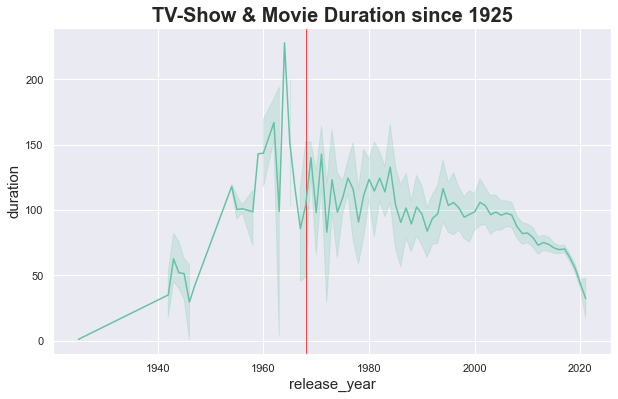

In [280]:
plt.axvline(x=1968, color="red", linewidth=.7)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_cleaned).set_title("TV-Show & Movie Duration since 1925")

df_cleaned.pivot_table(index=RELEASE_YEAR, values=DURATION, aggfunc=np.mean)

As we can see, there is a high volatility from the beginning to 1968. <br>
We also can see an steady descent of the duration since 2000.<br> 
Let's slice the data once since 1968 and once since 2000. Divided by the Type.

In [281]:
df_cleaned[TYPE].isna().sum()

0

In [282]:
is_movie = df_cleaned[TYPE] == "Movie"
is_ge_1968 = df_cleaned[RELEASE_YEAR] >= 1968
is_ge_2000 = df_cleaned[RELEASE_YEAR] >= 2000

df_movie_since_1968 = df_cleaned[(is_movie) & (is_ge_1968)]
df_movie_since_2000 = df_cleaned[(is_movie) & (is_ge_2000)]

df_tv_since_1968 = df_cleaned[(~is_movie) & (is_ge_1968)]
df_tv_since_2020 = df_cleaned[(~is_movie) & (is_ge_2000)]

df_tv_since_1968.shape[0], df_tv_since_2020.shape[0], df_movie_since_1968.shape[0], df_movie_since_2000.shape[0]

(2406, 2363, 5337, 4975)

#### Is the Movie-Duration decreasing over the time (since 2000)?

Text(0.5, 1.0, 'Movie Duration since 1968')

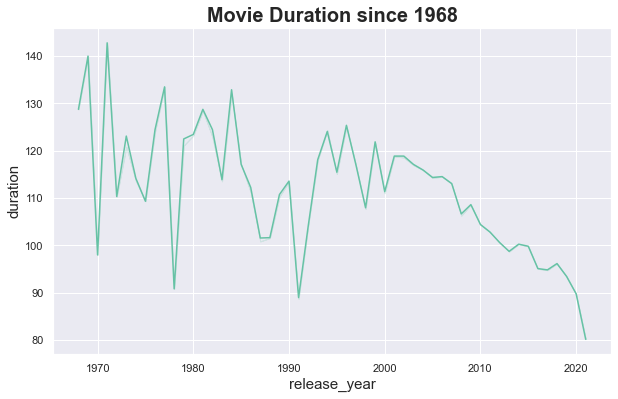

In [283]:
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_1968, ci=False).set_title("Movie Duration since 1968")

Text(0.5, 1.0, 'Movie Duration since 2000')

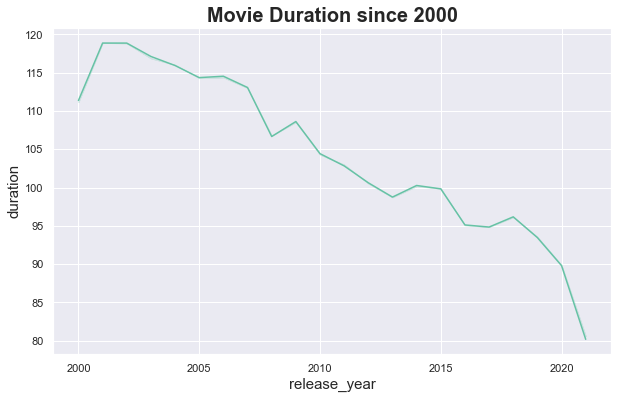

In [284]:
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000, ci=False).set_title("Movie Duration since 2000")

Text(0.5, 1.0, 'Movie Duration since 2000')

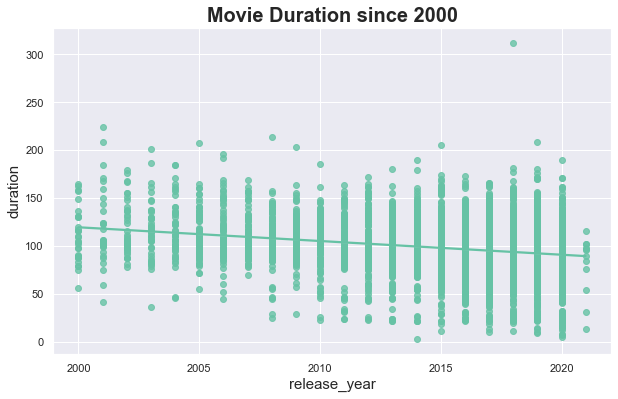

In [285]:
sns.regplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000, ci=False).set_title("Movie Duration since 2000")

In [286]:
df_movie_since_2000[GENRE].value_counts()

Dramas                  1305
Comedies                1002
Documentaries            740
Action                   616
Children                 477
Stand-Up                 307
Horror Movies            239
International Movies     113
Uncategorized             55
Thrillers                 44
Independent Movies        20
Anime Features            19
Music                     17
Sci-Fi                    11
Cult Movies                4
Romantic Movies            3
Sports Movies              1
Classic Movies             1
LGBTQ Movies               1
Name: genre, dtype: int64

Text(0.5, 1.0, 'Movie Duration since 2000 divided by Genre')

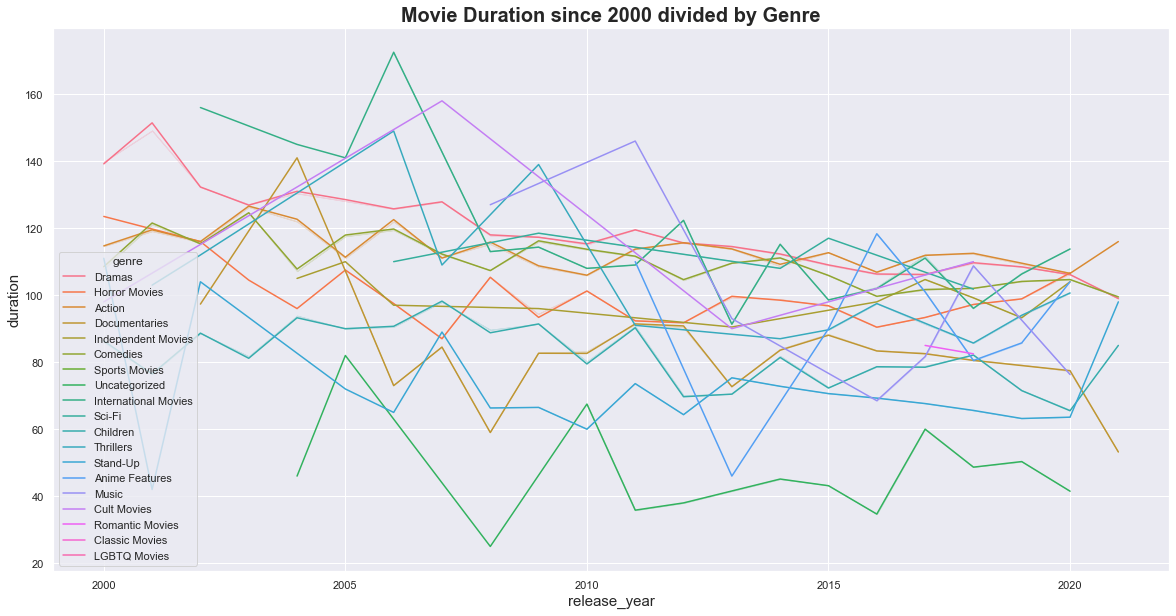

In [287]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000, hue=GENRE, ci=False).set_title("Movie Duration since 2000 divided by Genre")

very messy

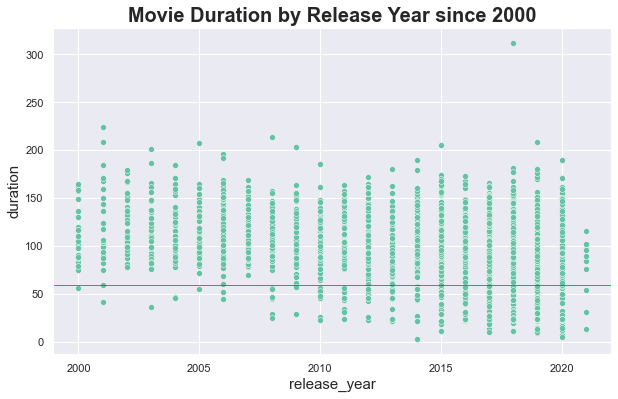

In [288]:
sns.scatterplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000).set_title("Movie Duration by Release Year since 2000")
plt.axhline(y=60, color="red", linewidth=.7)

We can see that the movie count increases very strong and over the time and short movies will be produced more and more.

In [289]:
df_movie_since_2000.pivot_table(index=GENRE, values=DURATION, aggfunc=np.mean).sort_values(by=DURATION, ascending=False)

,duration
genre,
Classic Movies,122.000000
Cult Movies,114.000000
Action,111.793831
Dramas,110.980843
International Movies,109.415929
Sci-Fi,108.090909
Comedies,106.130739
LGBTQ Movies,99.000000
Independent Movies,98.700000


As we can see, "normal" genres like action, horror, thrillers until romantic videos got an longer movie duration as genres like [Documentaries, Children, Stand-Up, Uncategorized] <br>
Maybe the count of these movies did increase

Text(0.5, 1.0, 'Development of Movie Genre since 2000')

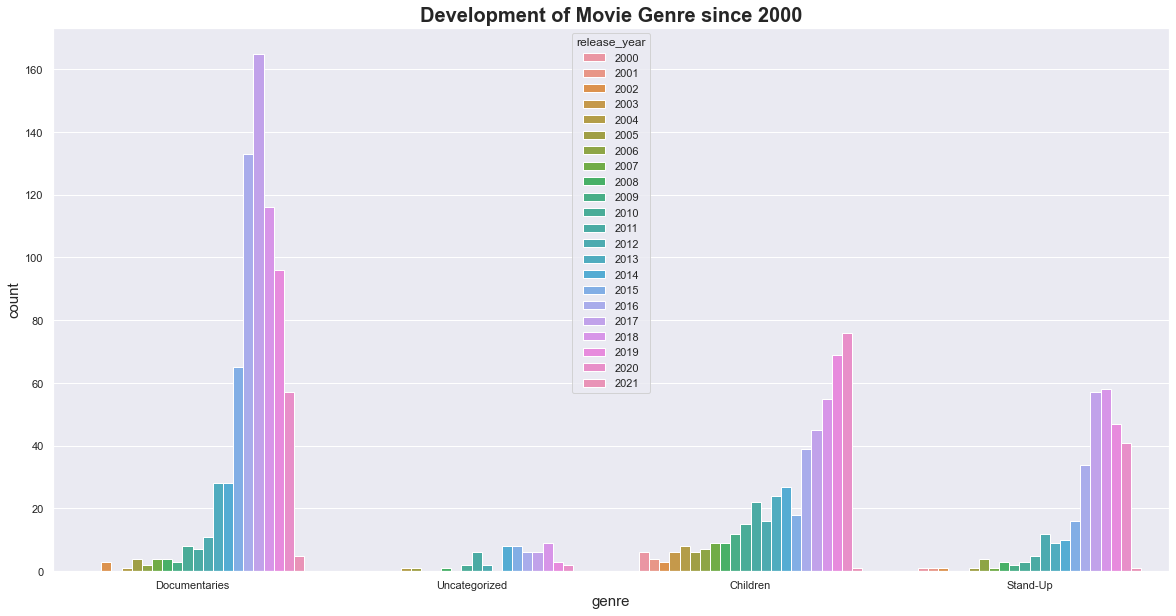

In [290]:
plt.figure(figsize=(20, 10))
short_movie_genres = ["Documentaries", "Children", "Stand-Up", "Uncategorized"]
sns.countplot(x=GENRE, hue=RELEASE_YEAR, hue_order=[x for x in range(2000, 2022)], data=df_movie_since_2000[df_movie_since_2000[GENRE].isin(short_movie_genres)]).set_title("Development of Movie Genre since 2000")

In [291]:
df_movie_since_2000.pivot_table(index=GENRE, values=DURATION, columns=RELEASE_YEAR, aggfunc="mean")


release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
genre,,,,,,,,,,,,,,,,,,,,,
Action,114.714286,119.500000,116.000000,126.583333,122.666667,111.333333,122.555556,111.071429,115.857143,108.764706,...,115.653846,113.807692,109.217391,112.680000,106.858974,111.887500,112.493671,109.547619,106.500000,116.0
Anime Features,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,46.000000,NaN,90.000000,118.333333,101.000000,80.500000,85.750000,104.000000,NaN
Children,86.333333,76.500000,88.666667,81.166667,93.250000,90.000000,90.714286,98.222222,88.777778,91.416667,...,69.687500,70.458333,81.407407,72.277778,78.641026,78.488889,82.127273,71.507246,65.513158,85.0
Classic Movies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN
Comedies,108.500000,121.545455,115.333333,124.600000,107.800000,117.944444,119.750000,112.277778,107.333333,116.218750,...,104.638298,109.545455,111.120690,105.890411,99.663636,101.687023,102.037037,104.103774,104.661972,99.5
Cult Movies,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,158.000000,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,NaN,110.000000,NaN,NaN,NaN
Documentaries,NaN,NaN,97.333333,NaN,141.000000,107.250000,73.000000,84.500000,59.000000,82.666667,...,90.818182,72.678571,83.571429,88.046154,83.345865,82.515152,80.534483,78.989583,77.473684,53.2
Dramas,139.200000,151.428571,132.285714,126.875000,131.000000,128.533333,125.764706,127.863636,118.000000,117.272727,...,115.594595,114.518519,112.295082,109.023622,106.315217,106.184211,109.688442,108.445946,106.146067,99.0
Horror Movies,123.500000,NaN,116.000000,104.500000,96.000000,107.500000,97.500000,87.000000,105.333333,93.375000,...,91.750000,99.666667,98.500000,96.846154,90.444444,93.342105,97.219512,98.900000,106.650000,NaN


In [292]:
df_movie_since_2000.pivot_table(index=GENRE, values=DURATION, columns=RELEASE_YEAR, aggfunc="count")

release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
genre,,,,,,,,,,,,,,,,,,,,,
Action,7.0,8.0,12.0,12.0,15.0,12.0,9.0,14.0,21.0,17.0,...,26.0,26.0,23.0,50.0,78.0,80.0,79.0,42.0,38.0,1.0
Anime Features,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,3.0,4.0,4.0,4.0,1.0,NaN
Children,6.0,4.0,3.0,6.0,8.0,6.0,7.0,9.0,9.0,12.0,...,16.0,24.0,27.0,18.0,39.0,45.0,55.0,69.0,76.0,1.0
Classic Movies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Comedies,8.0,11.0,3.0,10.0,10.0,18.0,24.0,18.0,30.0,32.0,...,47.0,44.0,58.0,73.0,110.0,131.0,135.0,106.0,71.0,2.0
Cult Movies,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Documentaries,NaN,NaN,3.0,NaN,1.0,4.0,2.0,4.0,4.0,3.0,...,11.0,28.0,28.0,65.0,133.0,165.0,116.0,96.0,57.0,5.0
Dramas,5.0,7.0,14.0,8.0,10.0,15.0,17.0,22.0,27.0,22.0,...,37.0,54.0,61.0,127.0,184.0,190.0,199.0,148.0,89.0,2.0
Horror Movies,2.0,NaN,1.0,4.0,1.0,2.0,4.0,2.0,3.0,8.0,...,4.0,9.0,16.0,13.0,27.0,38.0,41.0,30.0,20.0,NaN


which movie genre count increases strongly

In [293]:
is_2000_2009 = df_movie_since_2000[RELEASE_YEAR] <= 2009
df_movie_since_2000_2009 = df_movie_since_2000[is_2000_2009]
df_movie_2010_2020 = df_movie_since_2000[~is_2000_2009]

Text(0.5, 1.0, 'Total Genre count 2010 - 2020')

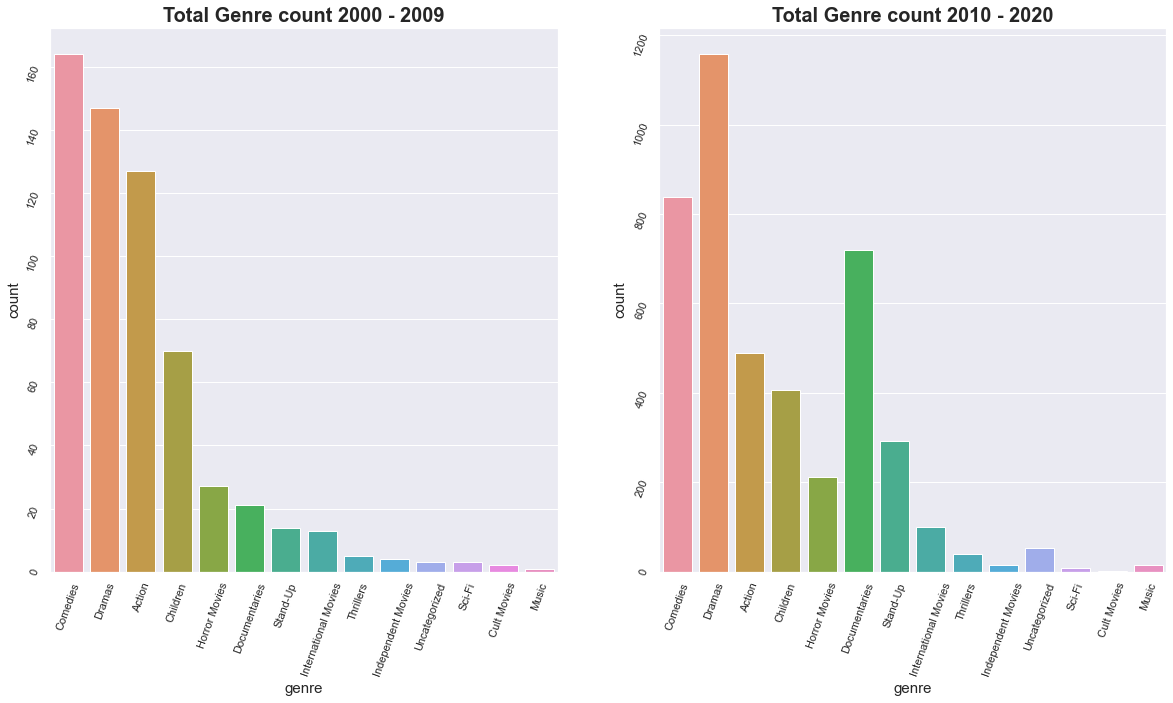

In [294]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1, ax2 = axes
ax1.tick_params(rotation=70)
ax2.tick_params(rotation=70)

order = df_movie_since_2000_2009[GENRE].value_counts().index
sns.countplot(x=GENRE, data=df_movie_since_2000_2009, ax=ax1, order=order).set_title("Total Genre count 2000 - 2009")
sns.countplot(x=GENRE, data=df_movie_2010_2020, ax=ax2, order=order).set_title("Total Genre count 2010 - 2020")
# df_movie_since_2000_2009.pivot_table(x=GENRE, )

We can see that in relation to the the data from 2000 to 2010 the number of Documentaries exploding and the other low duration genres like Stand-Up, Uncategorized are more present, then 2000 to 2010

In [295]:
COUNT_2000_2009 = "count_2000_2009"
COUNT_2010_2020 = "count_2010_2020"
df_2000_2009_genre_counts = df_movie_since_2000_2009.pivot_table(index=GENRE, values=DURATION, aggfunc="count").rename(columns={DURATION: "count_2000_2009"}).reset_index()
df_2010_2020_genre_counts = df_movie_2010_2020.pivot_table(index=GENRE, values=DURATION, aggfunc="count").rename(columns={DURATION: "count_2010_2020"}).reset_index()
merged_genre_count = pd.merge(df_2000_2009_genre_counts, df_2010_2020_genre_counts, on=GENRE, how="left")
merged_genre_count

,genre,count_2000_2009,count_2010_2020
0,Action,127,489
1,Children,70,407
2,Comedies,164,838
3,Cult Movies,2,2
4,Documentaries,21,719
5,Dramas,147,1158
6,Horror Movies,27,212
7,Independent Movies,4,16
8,International Movies,13,100
9,Music,1,16


In [296]:
INCREASE_RATE = "increase_rate"
merged_genre_count[INCREASE_RATE] = merged_genre_count[COUNT_2010_2020] / merged_genre_count[COUNT_2000_2009]
merged_genre_count.sort_values(by=INCREASE_RATE, ascending=False)

,genre,count_2000_2009,count_2010_2020,increase_rate
4,Documentaries,21,719,34.238095
11,Stand-Up,14,293,20.928571
13,Uncategorized,3,52,17.333333
9,Music,1,16,16.000000
5,Dramas,147,1158,7.877551
6,Horror Movies,27,212,7.851852
12,Thrillers,5,39,7.800000
8,International Movies,13,100,7.692308
1,Children,70,407,5.814286
2,Comedies,164,838,5.109756


,genre,increase_rate
4,Documentaries,34.238095
11,Stand-Up,20.928571
13,Uncategorized,17.333333
9,Music,16.000000
5,Dramas,7.877551
6,Horror Movies,7.851852
12,Thrillers,7.800000
8,International Movies,7.692308
1,Children,5.814286
2,Comedies,5.109756


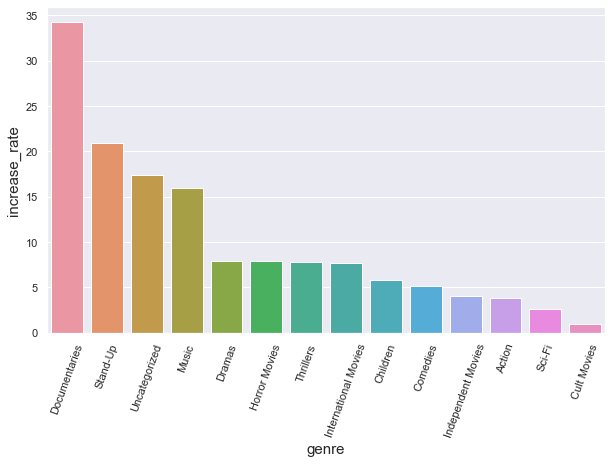

In [297]:
plt.xticks(rotation=70)
order = merged_genre_count.sort_values(by=INCREASE_RATE, ascending=False)[GENRE]
sns.barplot(y=INCREASE_RATE, x=GENRE, data=merged_genre_count, order=order)
merged_genre_count[[GENRE, INCREASE_RATE]].sort_values(by=INCREASE_RATE, ascending=False)

In [298]:
cmap_series = df_movie_since_2000[GENRE].copy()
cmap_series[~cmap_series.isin(short_movie_genres)] = "Normal"
cmap_series

1              Normal
2              Normal
3              Normal
4              Normal
6              Normal
            ...      
7781         Children
7782           Normal
7783           Normal
7784    Documentaries
7786    Documentaries
Name: genre, Length: 4975, dtype: object

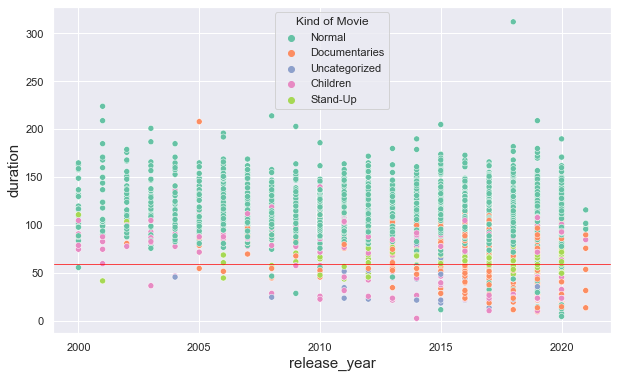

In [299]:
sns.scatterplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_since_2000, hue=cmap_series).set_title("")
plt.axhline(y=60, color="red", linewidth=.7)
plt.legend(title="Kind of Movie")#, labels=["Normal", short_movie_genres[0], short_movie_genres[1], short_movie_genres[2], short_movie_genres[3]])

As we can see, the most shorter movies are the abnormal movie genres. <br>
And we found out, that exacly these genres got the highest increasing rate.

##### Drop Genres: Documentaries, Stand-Up, Uncategorized, Children and Movies under 60 minutes
- under 60 minutes, because these aren't real movies and with more movies, there came more short movies. But these are not representative for our question
- the others, because they are shorter then normal movies and don't represent normal movies

In [300]:
is_duration_ge_60_min = df_movie_since_1968[DURATION] >= 60
is_not_short_movie = ~df_movie_since_1968[GENRE].isin(short_movie_genres)

df_movie_cleaned_since_1968 = df_movie_since_1968.loc[(is_duration_ge_60_min) & (is_not_short_movie)]
df_movie_cleaned_since_1968

,release_year,duration,type,country,genre
1,2016,93,Movie,Mexico,Dramas
2,2011,78,Movie,Singapore,Horror Movies
3,2009,80,Movie,United States,Action
4,2008,123,Movie,United States,Dramas
6,2019,95,Movie,Egypt,Horror Movies
...,...,...,...,...,...
7774,2007,158,Movie,United States,Cult Movies
7778,2009,88,Movie,United States,Comedies
7780,2018,94,Movie,India,Dramas
7782,2005,99,Movie,Sweden,Dramas


<AxesSubplot:xlabel='release_year', ylabel='duration'>

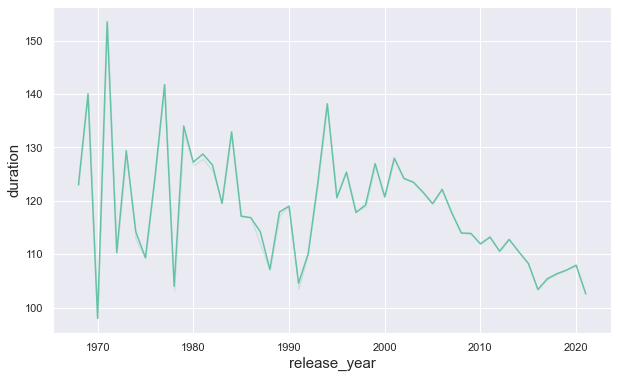

In [301]:
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_1968, ci=False)

<AxesSubplot:xlabel='release_year', ylabel='duration'>

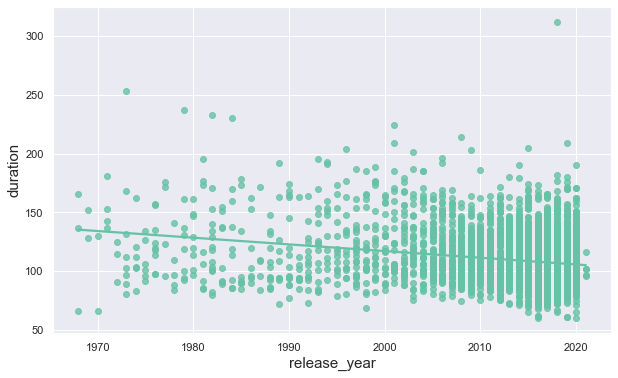

In [302]:
sns.regplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_1968, ci=False)

In [303]:
df_movie_cleaned_since_2000 = df_movie_cleaned_since_1968[df_movie_cleaned_since_1968[RELEASE_YEAR] >= 2000]
df_movie_cleaned_since_2000

,release_year,duration,type,country,genre
1,2016,93,Movie,Mexico,Dramas
2,2011,78,Movie,Singapore,Horror Movies
3,2009,80,Movie,United States,Action
4,2008,123,Movie,United States,Dramas
6,2019,95,Movie,Egypt,Horror Movies
...,...,...,...,...,...
7774,2007,158,Movie,United States,Cult Movies
7778,2009,88,Movie,United States,Comedies
7780,2018,94,Movie,India,Dramas
7782,2005,99,Movie,Sweden,Dramas


<AxesSubplot:xlabel='release_year', ylabel='duration'>

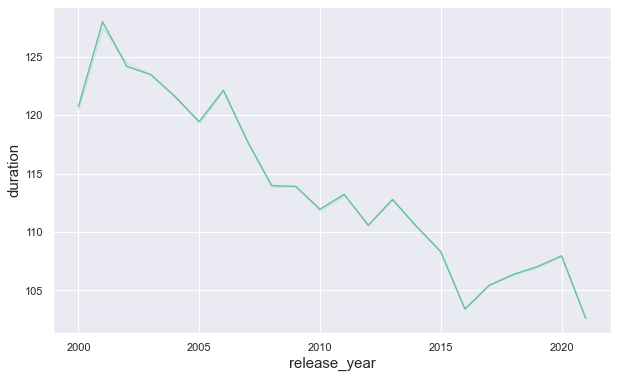

In [304]:
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_2000, ci=False)

<AxesSubplot:xlabel='release_year', ylabel='duration'>

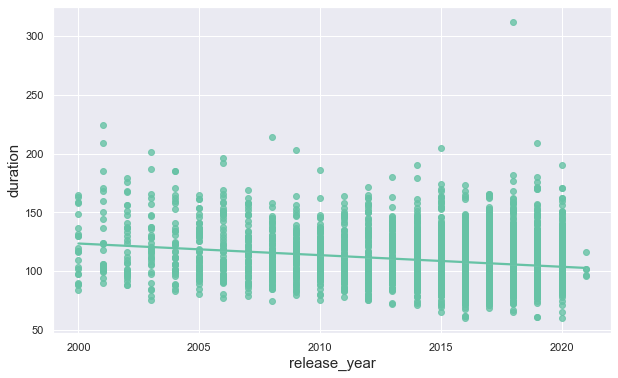

In [305]:
sns.regplot(x=RELEASE_YEAR, y=DURATION, data=df_movie_cleaned_since_2000, ci=False)

Finally we can say, that the movie duration decrease over the time. Especially after the year 2000.

### Is the TV-Show-Duration decreasing over the timer?

<AxesSubplot:xlabel='release_year', ylabel='duration'>

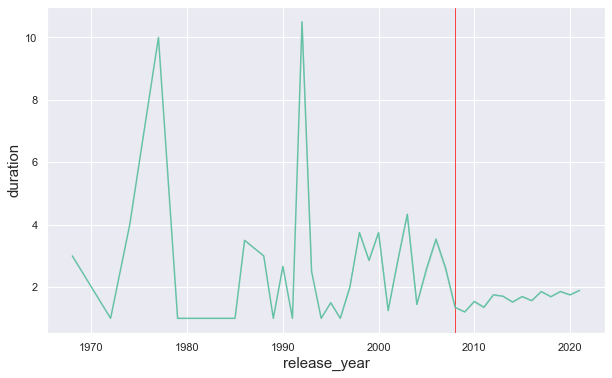

In [309]:
plt.axvline(x=2008, color="red", linewidth=.7)
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_tv_since_1968, ci=False)

The data shows to ge interesting at the year 2008.

<AxesSubplot:xlabel='release_year', ylabel='duration'>

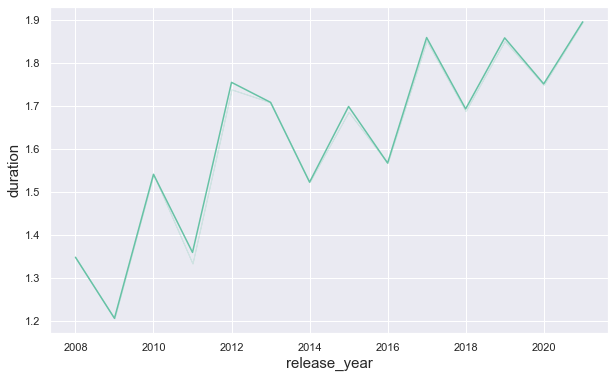

In [312]:
df_tv_since_2008 = df_tv_since_1968[df_tv_since_1968[RELEASE_YEAR] >= 2008]

sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_tv_since_2008, ci=False)

In [326]:
df_tv_relevant_since_2008 = df_tv_since_2008[GENRE].value_counts()
relevant_tv_genres = df_tv_relevant_since_2008[df_tv_relevant_since_2008 >= 100].index
is_relevant_genre = df_tv_since_2008[GENRE].isin(relevant_tv_genres)
relevant_tv_genres

Index(['International TV', 'Crime TV', 'Kids', 'British TV', 'Docuseries',
       'Anime Series', 'TV Comedies', 'Reality TV'],
      dtype='object')

<AxesSubplot:xlabel='release_year', ylabel='duration'>

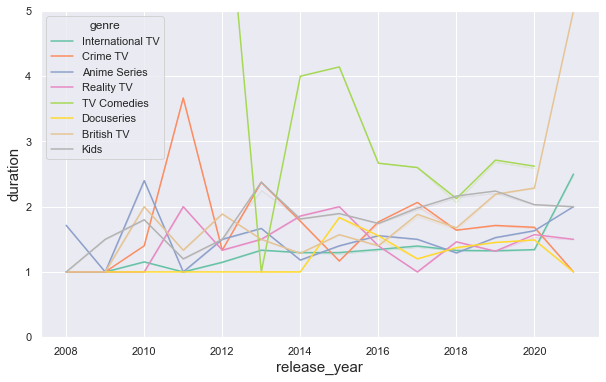

In [332]:
plt.ylim((0, 5))
sns.lineplot(x=RELEASE_YEAR, y=DURATION, data=df_tv_since_2008[is_relevant_genre], hue=GENRE, ci=False)

Finally we can say that the duration of TV-Shows increasing continuously since 2008. 